# Palmer Penguins
***

This notebook contains an analysis of the Palmer penguin [dataset](https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv) (Horst AM, Hill AP, Gorman KB, 2020). Data was collected by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER (Long Term Ecological Research Network).

This dataset was created as a introductory dataset for data analysis and exploration. More about the dataset can be found [here.](https://allisonhorst.github.io/palmerpenguins/)

![penguins](./img/p2.png "Image generate using DALL.E")

This image was generated using DALL·E 2.

The datsaset documents three penguin species in the Palmer Archipelago, Antarctica. In order to explore the dataset we must first read in the dataset from a csv file. This can be done with a library called [Pandas](https://pandas.pydata.org/docs/getting_started/overview.html). Pandas is an open source data analysis library for Python. Under the hood is [NumPy](https://numpy.org/), a library for operating on large arrays and matrices. We will also import [Matplotlob](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/), for data visualisation later in the notebook.

### Import Libraries

In [2]:
# import the pandas library
import pandas as pd

# matplotlib is a polular plotting library
# import (part of) matplotlib, the pyplot module
import matplotlib.pyplot as plt

# import numpy for calculating line of best fit (polyfit)
import numpy as np

# seaborn is another popular statistical plotting library
import seaborn as sns

Note in the cell above how the names are abbreviated, for ease of use later. With Pandas imported, we can now load the dataset into whats known as a [dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html). A dataframe is a two dimensional data structure similar to a spreadsheet. It contains rows and columns just like a spreadsheet does.

In [3]:
# load local csv
df = pd.read_csv("./palmerpenguins_dataset.csv")

# or load dataset from web directly
#df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

Now that Pandas has read the dataset in as a Dataframe, what can we do with it? How can we view the data? How can we perform math on the data inside? How can we plot the data?

[*10 minutes to pandas*](https://pandas.pydata.org/docs/user_guide/10min.html#basic-data-structures-in-pandas) is a great introductory overview of the functionality Pandas provide for working with Dataframes.

Pandas docs have a good overview of basic operations [here](https://pandas.pydata.org/docs/reference/frame.html).

One of the first things to do would be to have a quick look inside. The dataframe may be too large to display, so there is a built in function to display a small version of the table - just the top and bottom:

In [4]:
# view a truncated version of the dataframe
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


We can see the column names. We can see how many rows there are in total. We also see that some entries are missing, represented by NaN. Its good to be aware of missing entries. For certain operations [data cleaning](https://en.wikipedia.org/wiki/Data_cleansing) may need to be performed, so keep this in mind when working with datasets.

In [5]:
# check how many missing entries in each column
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

There are a few missing entries, mainly in the "sex" column. 

Lets have a look at a penguin. A row contains all the attributes of a single penguin entity. Lets look at the first row or penguin in that dataset.

In [6]:
# view the first row in the dataframe
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In the first row we see all the data related to a single penguin. Its a male penguin weighing almost 4 kilograms, observed on the Torgersen island. Note that the data type is defined as an 'object'.

We can see what other datatypes are in the dataframe:

In [7]:
# view datatypes
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Some entries are `objects` and some are `float64`. What does that mean? Objects are structures used to hold strings (or mixed strings and numbers). They are basically just columns that contains strings. Only string operations (such as concatenation) can be performed on 'objects', . 

'float64' is more obvious, it is a floating point number (a decimal e.g. 1.0)

Note at the bottom of the output `dtype: object`. Thats referring to the Dataframe itself. The dataframe itself is an object. We could make a new dataframe with only the numeric columns, and see what datatype the dataframe is then:

In [8]:
# create new numeric-only df, select numeric columns only
numeric_df = df.select_dtypes(include=["number"])

# now check the datatypes of the new numeric-only dataframe
numeric_df.dtypes

bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
dtype: object

So it turns out that the dataframe is still an `object`, even though it only contains floats. This is because the dataframe itself is a complex structure that has more to it than just the columns contained inside. I guess it has metadata and that for how to behave like a spreadsheet or whatever, so it knows what things like columns or rows are i.e. its 2-dimensional.

Heres a quote from the Pandas docs regarding the Dataframe object:

>Can be thought of as a dict-like container for Series objects.

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame

A column is known as a Series. A Dataframe is made up from a bunch of Series objects.



Let's print the data types of both and see what we get:

In [9]:
# check datatype of Dataframe
print(type(df))

# check datatype of a Series
print(type(df["species"]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Let's have a quick look at the column names again, also known as headers:

In [10]:
# view headers 
df.columns.tolist()

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

We can see the column headings. One may question how many islands there are in the "island" Series? We can use Pandas `nunique()` function to find out. 

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html

In [11]:
# count the number of unique entries in each of the columns
df.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

This has counted the number of unique entries in each Series. There are 3 individual penguin species documented, and 3 different islands referenced. 


Another question is, how many of each penguin species are documented? To find out, we need to count how many of each unique entries there are.

The function `value_counts()` counts the number of values for each of the unique entries in a given Series.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html#pandas.DataFrame.value_counts

In [12]:
# select a Series, then count number of values for each unique value in that Series
df["species"].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

So we see that it is mostly Adelie penguins documented, whereas Chinstrap penguins are the least represented.

### Plotting with pandas

Pandas has built-in plotting functionality. Pandas uses another library call [matplotlib](https://matplotlib.org/) under the hood. A basic yet informative plot is the bar chart:

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html

<Axes: xlabel='species'>

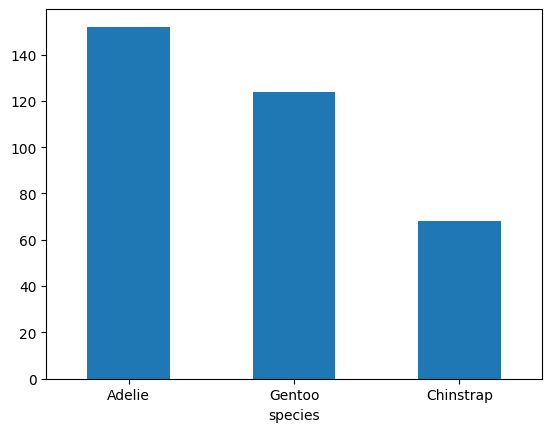

In [13]:
# count each of the entries under 'species' column and assign to a variable
species_count = df["species"].value_counts()

# create bar chart from the counted Series, and rotate the x-labels for readability
species_count.plot.bar(rot=0)

In the bar chart its easy to see that the Adelie penguin is the most documented in the dataset. We could also visualise this using a pie-chart:
    
  -  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html

<Axes: ylabel='count'>

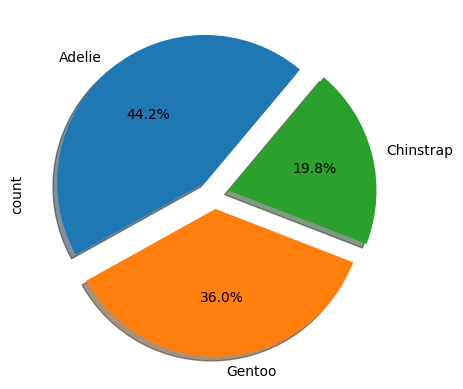

In [14]:
# plot a piechart, add percentage, explode the chart, and rotate
species_count.plot.pie(autopct="%.1f%%", explode=(0.1, 0.1, 0.1), shadow=True, startangle=50)

### Plotting with matplotlib

Lets try to put two plots on one figure using a *stateless* approach. 

- https://realpython.com/lessons/stateful-vs-stateless-approach/

We can achieve this using matplotlibs built-in subplots function.

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

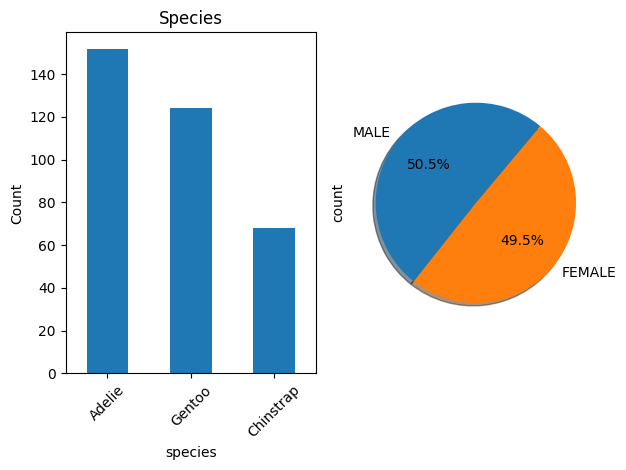

In [15]:
# set up the canvas to have subplots
# (N, n) sets how many subplots: N row, n columns
fig, ax = plt.subplots(1, 2) 

# plot species count
df["species"].value_counts().plot(kind="bar", ylabel="Count", rot=45, ax=ax[0])

# plot sex count
df["sex"].value_counts().plot.pie(autopct="%.1f%%", shadow=True, startangle=50, ax=ax[1])

# add titles 
ax[0].set_title("Species") 
#ax[1].set_title("Sex") 

# auto adjust layout of plots using tight_layout()
plt.tight_layout()

### Querying the dataframe

As well as visualising thet data through plotting, we can query the dataframe. We can pass multiple criteria into the query function.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html

In [16]:
# query 2 things
df.query('species=="Adelie" & sex=="FEMALE"')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
...,...,...,...,...,...,...,...
142,Adelie,Dream,32.1,15.5,188.0,3050.0,FEMALE
144,Adelie,Dream,37.3,16.8,192.0,3000.0,FEMALE
147,Adelie,Dream,36.6,18.4,184.0,3475.0,FEMALE
148,Adelie,Dream,36.0,17.8,195.0,3450.0,FEMALE


Can we plot that query? Check datatype  first.

In [17]:
print(type(df.query('species=="Adelie" & sex=="FEMALE"')))

<class 'pandas.core.frame.DataFrame'>


Its a Dataframe, so should be able to plot something from it. Lets see what this Dataframe looks like:

In [18]:
# creat new Dataframe from the query
new_df = df.query('species=="Adelie" & sex=="FEMALE"')

# print Dataframe (truncated)
new_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
...,...,...,...,...,...,...,...
142,Adelie,Dream,32.1,15.5,188.0,3050.0,FEMALE
144,Adelie,Dream,37.3,16.8,192.0,3000.0,FEMALE
147,Adelie,Dream,36.6,18.4,184.0,3475.0,FEMALE
148,Adelie,Dream,36.0,17.8,195.0,3450.0,FEMALE


We now have a new Dataframe containing only female penguins from the Adelie species.

## Statistics

An statistical overview of the dataframe can be easily done using pandas built-in `describe()` method.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

This only includes numeric columns, unless instructed otherwise.

In [19]:
# view statistics overview
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


We can even query the dataframe and get a statistical summary of only the stuff in question.

In [20]:
# query Dataframe and describe the queried bits only
df.query('species=="Adelie" & sex=="FEMALE"').describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,73.000000,73.000000,73.000000,73.000000
mean,37.257534,17.621918,187.794521,3368.835616
std,2.028883,0.942993,5.595035,269.380102
min,32.100000,15.500000,172.000000,2850.000000
25%,35.900000,17.000000,185.000000,3175.000000
50%,37.000000,17.600000,188.000000,3400.000000
75%,38.800000,18.300000,191.000000,3550.000000
max,42.200000,20.700000,202.000000,3900.000000


array([[<Axes: title={'center': 'bill_length_mm'}>,
        <Axes: title={'center': 'bill_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

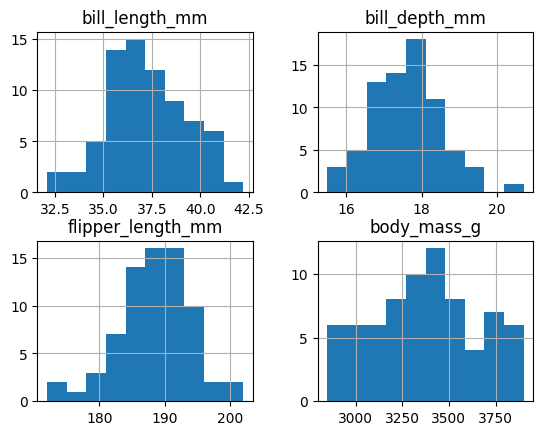

In [49]:
# query Dataframe and describe the queried bits only
df.query('species=="Adelie" & sex=="FEMALE"').hist()

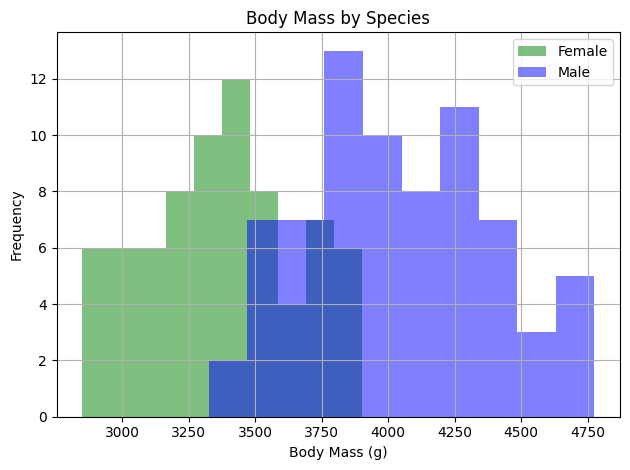

(array([0, 1, 2]),
 [Text(0, 0, 'Biscoe'), Text(1, 0, 'Dream'), Text(2, 0, 'Torgersen')])

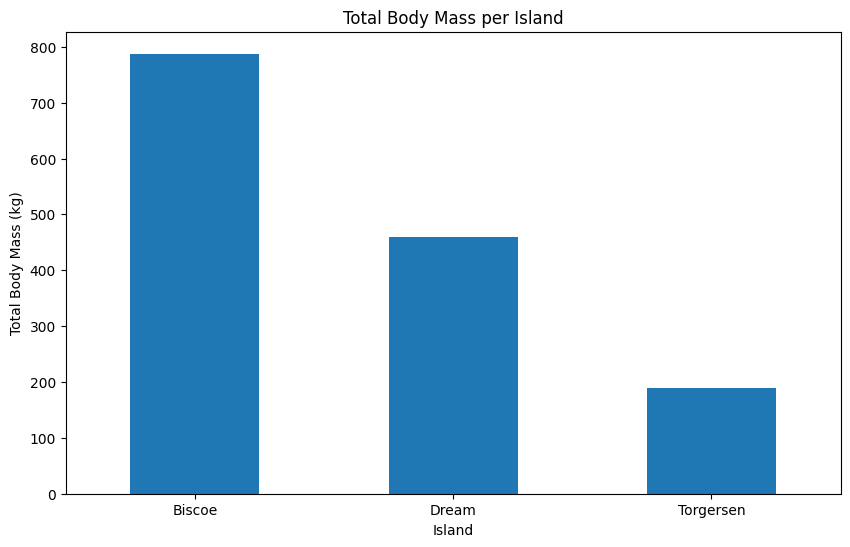

In [55]:
# group by island and sum body_mass_g for each island
total_mass_per_island = df.groupby("island")["body_mass_g"].sum() / 1000

# plot the total body mass per island
total_mass_per_island.plot(kind="bar", figsize=(10, 6))

# decorate the plot
plt.ylabel("Total Body Mass (kg)")
plt.title("Total Body Mass per Island")
plt.xticks(rotation=0)

Determine the mean using pandas built in function.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html

Mean is calculated using eqn:
$$\bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}$$

In [21]:
# calculate the mean of each of the numeric columns in the dataframe
df.mean(numeric_only=True)

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

Determine the mean for a single column only.

In [22]:
# calculate the mean of a specific column
df['body_mass_g'].mean()

4201.754385964912

The groupby() function is useful

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

We could first do a group_by thing(), then do the mean() of the entries of another column that are associated with each group 

- https://www.statology.org/pandas-mean-by-group/

In [23]:
# group by species and then use mean() function to calculate the mean body mass for each unique species entry
df.groupby('species')['body_mass_g'].mean()

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64

In [24]:
# save mean by species to a variable 
avg_weight_by_species = df.groupby('species')['body_mass_g'].mean()

# display to console
print(avg_weight_by_species)

species
Adelie       3700.662252
Chinstrap    3733.088235
Gentoo       5076.016260
Name: body_mass_g, dtype: float64


<Axes: title={'center': 'Average body mass'}, xlabel='species', ylabel='Grams'>

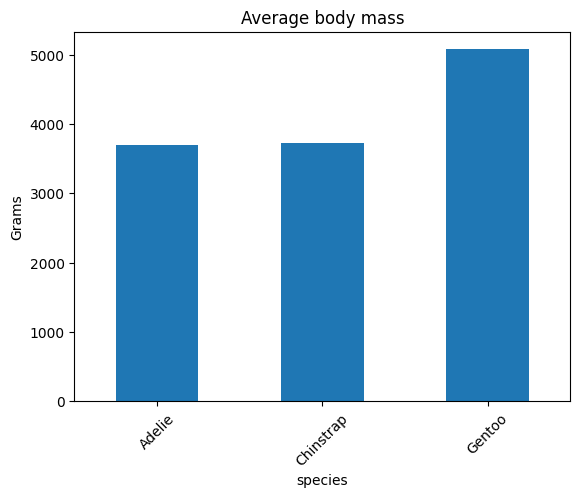

In [25]:
# display a plot of the average weight by species
avg_weight_by_species.plot.bar(title="Average body mass", ylabel="Grams", rot=45)

The groupby() function can be used for the following question, are each species confined to one island only, or spread around all three?

In [26]:
# group by 'species' and then see unique values in the 'island' column
df.groupby('species')['island'].unique()

species
Adelie       [Torgersen, Biscoe, Dream]
Chinstrap                       [Dream]
Gentoo                         [Biscoe]
Name: island, dtype: object

We see Chinstrap and Gentoo stick to one island, Adelie are all over the place.

Now I wonder are the Adelie mostly on one island or are they distriubted evenly throughout all three islands? How can I query that ...

In [27]:
# group by 'species' and then see value counts for the 'island' column
df.groupby('species')['island'].value_counts()

species    island   
Adelie     Dream         56
           Torgersen     52
           Biscoe        44
Chinstrap  Dream         68
Gentoo     Biscoe       124
Name: count, dtype: int64

<Axes: xlabel='species,island'>

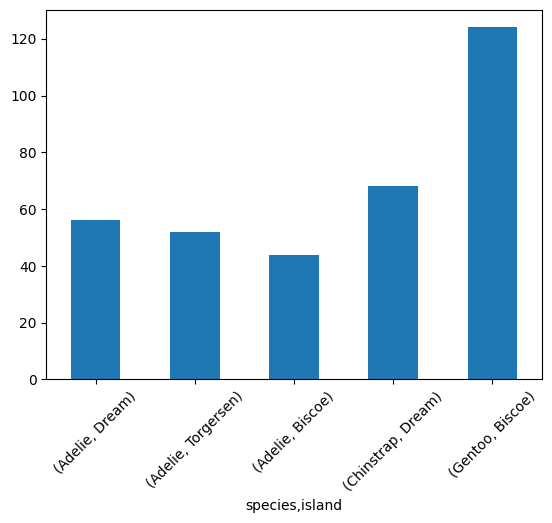

In [28]:
# plot that in a barchart
df.groupby('species')['island'].value_counts().plot(kind='bar', rot=45)

Where are the biggest penguins? Use nlargest():

In [29]:
# check the 5 largest penguins5
df.nlargest(5, 'body_mass_g')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
237,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,MALE
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE
297,Gentoo,Biscoe,51.1,16.3,220.0,6000.0,MALE
337,Gentoo,Biscoe,48.8,16.2,222.0,6000.0,MALE
299,Gentoo,Biscoe,45.2,16.4,223.0,5950.0,MALE


### Histograms

Pandas has a built in tools for plotting histograms.

Basic version: hist()

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

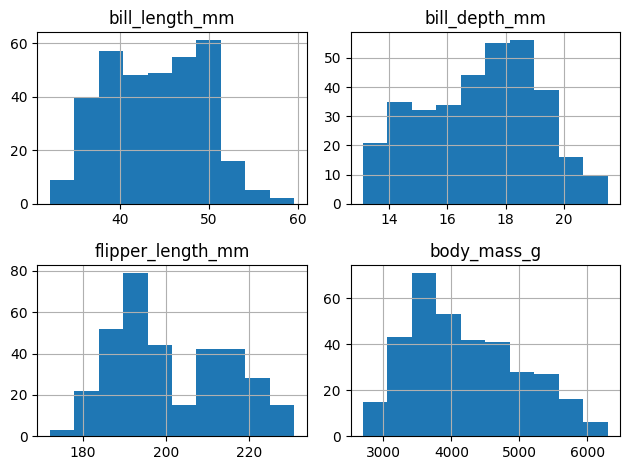

In [30]:
# plot a histogram using the basic hist() method
df.hist()
plt.tight_layout()

Plot histograms using matplotlib.

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist

Use get_group() to select which species to query.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.get_group.html

It would be nicer to combine them all in one histogram thoug:

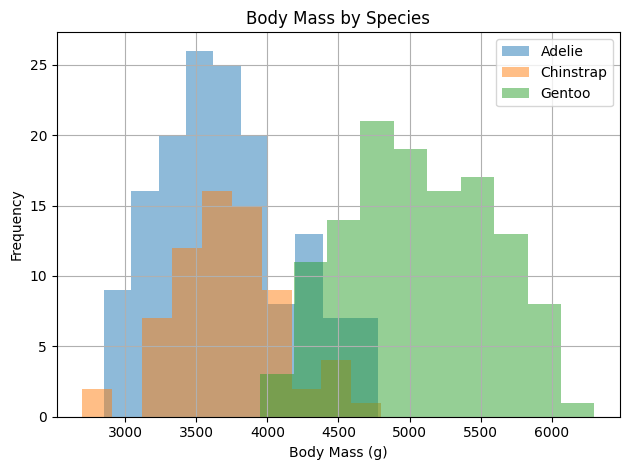

In [59]:
# group by species, and select Series "body_mass_g"
body_mass_by_species = df.groupby("species")["body_mass_g"]

# plotting histogram
fig, ax = plt.subplots(1, 1)

body_mass_by_species.hist(bins=10, alpha=0.5, ax=ax)

# decorate plot
ax.set_xlabel("Body Mass (g)")
ax.set_ylabel("Frequency")
ax.set_title("Body Mass by Species")

# add legend, use groups.keys() which are auto-created when using groupby() function
ax.legend(body_mass_by_species.groups.keys())

# auto-adjust plot dimensions
plt.tight_layout()

Use query to select 

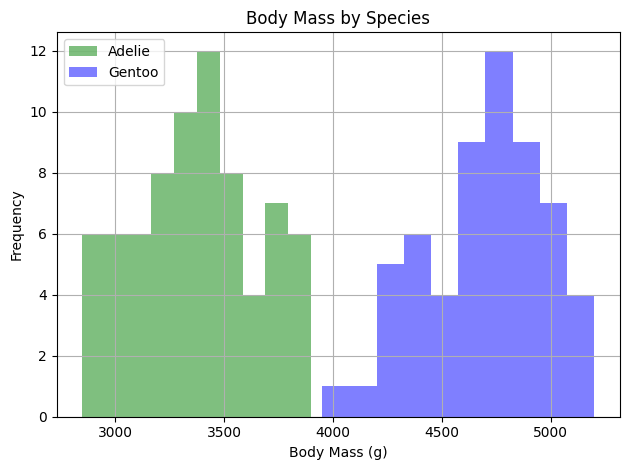

In [58]:
# set up canvas
fig, ax = plt.subplots(1, 1)

# plot the histograms
df.query('species=="Adelie" & sex=="FEMALE"')['body_mass_g'].hist(ax=ax, color="green", alpha=0.5, label="Adelie")
df.query('species=="Gentoo" & sex=="FEMALE"')['body_mass_g'].hist(ax=ax, color="blue", alpha=0.5, label="Gentoo")

# decorate the plot
ax.set_xlabel("Body Mass (g)")
ax.set_ylabel("Frequency")
ax.set_title("Body Mass by Species")
ax.legend()

# adjust plot dimensions
plt.tight_layout()

Now we on to two variables. Scatterplots are used to show the relationshipo between two variables.

We could use Seaborn to create scatterplots.

- https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Can we fit a line to it? Apparently [regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html) is for that. Seaborn describes regression things [here](https://seaborn.pydata.org/tutorial/regression.html). What is regression? [Libretexts](https://stats.libretexts.org/Courses/Concord_University/Elementary_Statistics/10%3A_Linear_Regression_and_Correlation/10.04%3A_The_Regression_Equation) has a good course on Linear Regression and Correlation. The [line of best fit](https://math.libretexts.org/Bookshelves/Algebra/Intermediate_Algebra_(Arnold)/03%3A_Linear_Functions/3.05%3A_The_Line_of_Best_Fit) approximates the data in a linear way.

There are functions called lmplot and regplot for regression plotting

- https://seaborn.pydata.org/tutorial/regression.html

> "These functions draw similar plots, but regplot() is an axes-level function, and lmplot() is a figure-level function."

Regplot:

- https://seaborn.pydata.org/generated/seaborn.regplot.html

Seaborn contains a similar function called lmplot(). Its similar to regplot but you can add a 'hue' related to another variable.

- https://seaborn.pydata.org/generated/seaborn.lmplot.html

The plot makes more sense now that we can differentiate by species. We see 3 lines of best fit, 1 for each species.

Seaborns joinplot() combines a couple of different plotting ideas.

- https://seaborn.pydata.org/generated/seaborn.jointplot.html

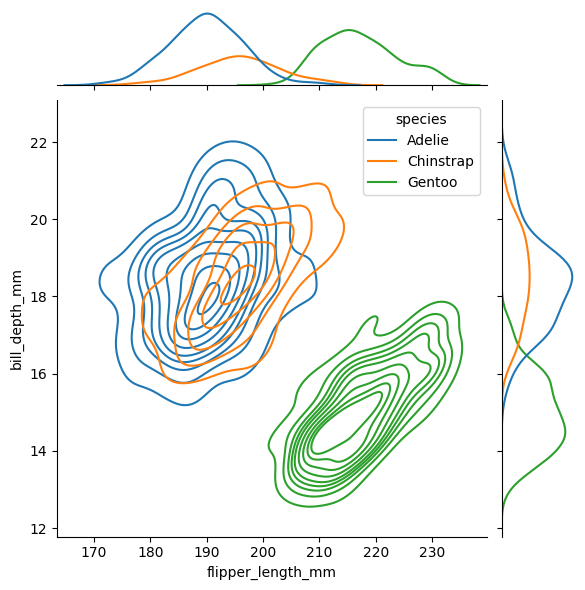

In [35]:
# create a joinplot using Seabonr
sns.jointplot(df, x="flipper_length_mm", y="bill_depth_mm", hue="species", kind="kde")

Can we add a line of best fit using matplot and NumPy? We can use NumPy polyfit and a bit of help from StackOverflow

- https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

- https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python

We use NumPy's `to_numpy()` function to convert Pandas Series to numpy arrays, then we can use `polyfit()` function.

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_numpy.html

A loop is created to cycle through each of the speices in the Dataframe and plot data for each unique species onto the same figure, colour coded:


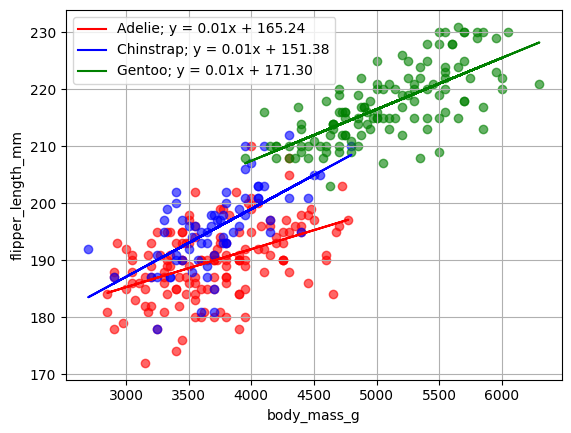

In [36]:
# create a list of unique species in the dataframe
unique_species_list = ["Adelie", "Chinstrap", "Gentoo"]

# set which variables we want plotted
var1 = "body_mass_g"
var2 = "flipper_length_mm"

# set up canvas for plotting
fig, ax = plt.subplots(1, 1) 

# make a list of colours for the scatterplot, one for each species
colors = ["red", "blue", "green"]

# loop through the list of unique species
for i, species in enumerate(unique_species_list):

    # create a new df by filtering the original dataframe
    species_df = df[df["species"] == species]

    # assign variables from dataframe
    x = species_df[var1]
    y = species_df[var2]

    # NaN values were creating an error for numpy, so clean Series first
    x = x.dropna()
    y = y.dropna()

    # convert both cleaned Series to numpy arrays
    x = x.to_numpy()
    y = y.to_numpy()

    # plot using matplotlibs scatter() method
    ax.scatter(x, y, alpha=0.6, color=colors[i])#, label=species)

    # determine line of best fit using polyfit()
    # https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
    # https://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python
    m, c = np.polyfit(x, y, 1)

    # add line of best fit to plot
    # use y=mx+c 
    ax.plot(x, m*x+c, color=colors[i], label=f"{species}; y = {m:.2f}x + {c:.2f}")

# decorate the plot
ax.set_xlabel(var1)
ax.set_ylabel(var2)
# add grid to plot
ax.grid(True)
ax.legend()

heatmaps look cool, matplotlib or seaborn. uses df.corr
- https://statisticsglobe.com/plot-correlation-matrix-matplotlib-seaborn-python

In [37]:
# plot a heatmap 
sns.heatmap(df.corr(numeric_only=True), annot=True, ax=ax)

<Axes: >

The greatest correlation is flipper length to body mass.

Pairplot

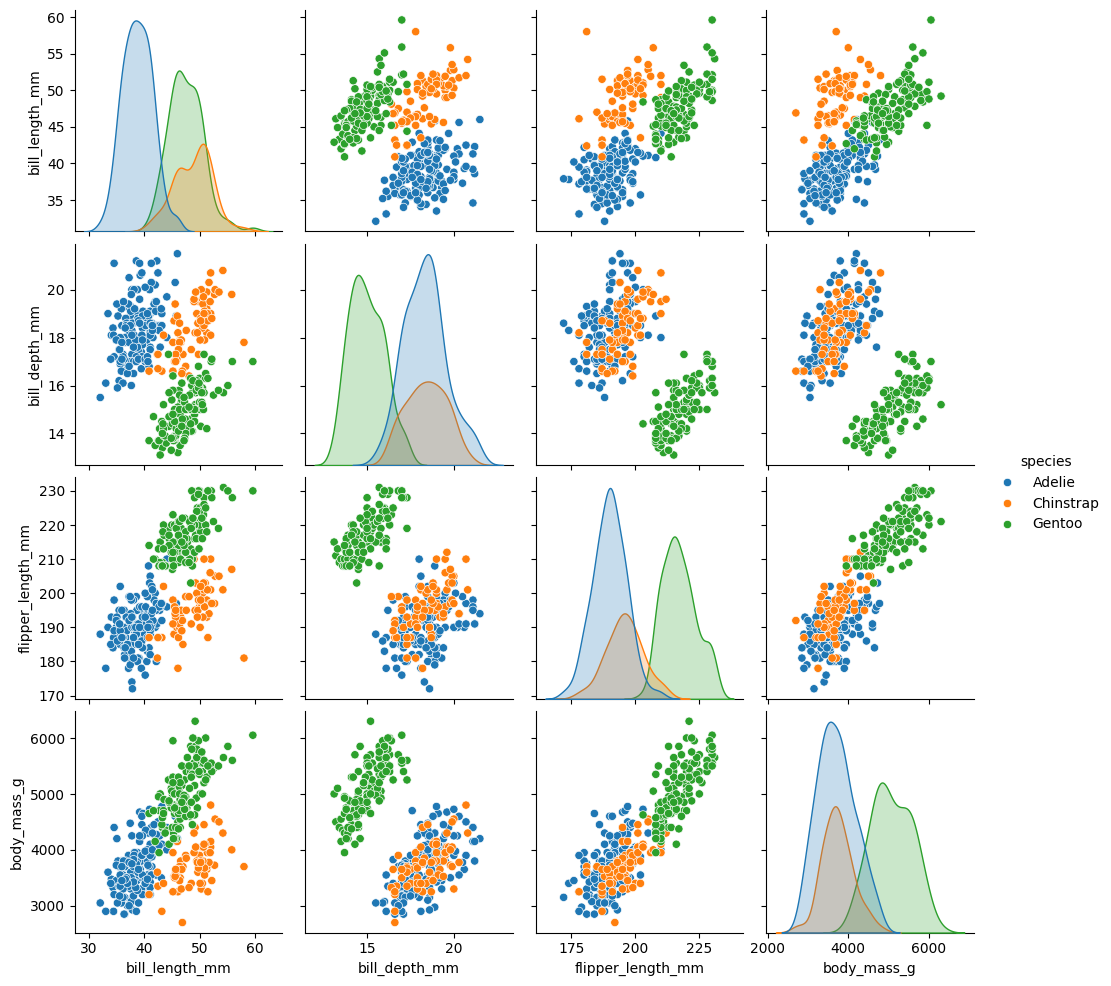

In [38]:
# plot pairplot using seaborn 
sns.pairplot(df, hue="species")

***

### End